In [ ]:
# pip install pandas

In [ ]:
# pip install matplotlib

In [ ]:
# pip install gensim

In [ ]:
# pip install openpyxl

In [1]:
import random
import numpy as np
import pandas as pd
import time
import re
import datetime
import os
import matplotlib.pyplot as plt
import gensim
# import spacy

In [2]:
# pip install bertopic

In [3]:
# conda install -c conda-forge ipywidgets

In [4]:
# from ipywidgets import FloatProgress

In [5]:
from bertopic import BERTopic

## Read data

In [6]:
# conda install -c anaconda openpyxl 

In [143]:
df0 = pd.read_excel('data/Jul21_3379_articles.xlsx',index_col=0)
df0 = df0.reset_index()
df0 = df0.drop(columns=['index'])
df0.head()

,newsOutlet,dateSeen,url,title,language,sourceCountry,text,category,textCharCt
0,apnews.com,2021-10-12 07:00:00,https://apnews.com/article/technology-business...,"EU , Ukraine to discuss military training and ...",English,United States,BRUSSELS (AP) — The European Union is consider...,western,3318
1,apnews.com,2021-10-12 07:00:00,https://apnews.com/cdfd9b277f6bade5697e0427429...,Blinken reaffirms US support for Ukraine amid ...,English,United States,"KYIV, Ukraine (AP) — U.S. Secretary of State A...",western,6032
2,apnews.com,2021-10-11 07:00:00,https://apnews.com/90b50e622cefcbaeba96cb5e716...,"EU , Ukraine to discuss military training and ...",English,United States,BRUSSELS (AP) — The European Union is consider...,western,3318
3,apnews.com,2021-10-06 07:00:00,https://apnews.com/0b689a7baaac58603e4d7453aa5...,Ukraine Holocaust center names Nazi Babi Yar k...,English,United States,"KYIV, Ukraine (AP) — The presidents of Ukraine...",western,3646
4,apnews.com,2021-10-13 07:00:00,https://apnews.com/89d2455274aad5fe166445a5f82...,Ukraine separatist areas overwhelmed by soarin...,English,United States,"KYIV, Ukraine (AP) — The Russia-backed separat...",western,2184


In [42]:
del mtdf

In [256]:
# Moscow times
mtdf = pd.read_excel('data/themoscowtimes.com_07-21-2022.xlsx',index_col=0)
mtdf = mtdf.drop_duplicates(subset=['text'])
mtdf = mtdf[mtdf['text'].apply(lambda t : t.lower().count('ukrain') >= 2)]
mtdf['category'] = 'moscowtimes'
mtdf.head()

,newsOutlet,dateSeen,url,title,language,sourceCountry,text,category
0,themoscowtimes.com,1633071600,https://www.themoscowtimes.com/2021/10/01/ukra...,Ukraine Calls for Russia Sanctions Over Hungar...,English,Russia,Ukraine said Friday it wants Germany and the U...,moscowtimes
1,themoscowtimes.com,1634194800,https://www.themoscowtimes.com/2021/10/14/form...,Former Head of Chernobyl Nuclear Plant Dies - ...,English,Russia,The director of the Chernobyl nuclear plant wh...,moscowtimes
2,themoscowtimes.com,1633935600,https://www.themoscowtimes.com/2021/10/11/russ...,Russia Shouldnt Negotiate With Vassal Ukrain...,English,Russia,Russia cannot negotiate with the “vassal” lead...,moscowtimes
3,themoscowtimes.com,1634022000,https://www.themoscowtimes.com/2021/10/12/russ...,"Russia , France , Germany May Meet on Ukraine ...",English,Russia,"Russia, France and Germany said Monday that th...",moscowtimes
4,themoscowtimes.com,1634281200,https://www.themoscowtimes.com/2021/04/12/2-uk...,2 Ukrainian Soldiers Killed in War - Torn Sepa...,English,Russia,Two Ukrainian soldiers have been killed in cla...,moscowtimes


In [258]:
del df

In [259]:
df = pd.concat([df0, mtdf],axis=0)
df = df.reset_index()
del df['index']
len(df)

3541

In [260]:
df.tail()

,newsOutlet,dateSeen,url,title,language,sourceCountry,text,category,textCharCt
3536,themoscowtimes.com,1642060800,https://www.themoscowtimes.com/2022/01/13/sanc...,"Sanctions on Putin Would be Step Too Far , Kre...",English,Russia,The United States’ plans to levy sanctions aga...,moscowtimes,NaN
3537,themoscowtimes.com,1641801600,https://www.themoscowtimes.com/2022/01/10/news...,News From Russia : What You Missed Over the We...,English,Russia,Security talks A top Russian official said he ...,moscowtimes,NaN
3538,themoscowtimes.com,1642147200,https://www.themoscowtimes.com/2022/01/14/russ...,"Russian Diplomat Praises Rappers Ye , Oxxxymir...",English,Russia,Will hip-hop actually save the world? A senior...,moscowtimes,NaN
3539,themoscowtimes.com,1641801600,https://www.themoscowtimes.com/2022/01/10/kaza...,Kazakhstan Largest City Back Online After Clas...,English,Russia,Kazakhstan's largest city was back online and ...,moscowtimes,NaN
3540,themoscowtimes.com,1641456000,https://www.themoscowtimes.com/2022/01/06/russ...,Russia Involvement in Kazakhstan Crisis Could ...,English,Russia,Russia’s deployment of troops as part of a mil...,moscowtimes,NaN


In [261]:
bbcdf = df[df['newsOutlet'].apply(lambda x: x == 'bbc.co.uk')]
print('bbc:', len(bbcdf))
apdf = df[df['newsOutlet'].apply(lambda x: x == 'apnews.com')]
print('apnews:', len(apdf))
reutersdf = df[df['newsOutlet'].apply(lambda x: x == 'reuters.com')]
print('reuters:', len(reutersdf))
spdf = df[df['newsOutlet'].apply(lambda x: x == 'sputniknews.com')]
print('sputnik:', len(spdf))
tassdf = df[df['newsOutlet'].apply(lambda x: x == 'tass.com')]
print('tass:', len(tassdf))
print()
westerndf = df[df['category'].apply(lambda x: x == 'western')]
print('western:', len(westerndf))
russiandf = df[df['category'].apply(lambda x: x == 'russian')]
print('russian state media:', len(russiandf))

mt = df[df['category'].apply(lambda x: x == 'moscowtimes')]
print('moscowtimes:', len(mt))

bbc: 259
apnews: 495
reuters: 274
sputnik: 921
tass: 1430

western: 1028
russian state media: 2351
moscowtimes: 162


## Pre-process documents

In [159]:
import nltk
from nltk.tokenize import sent_tokenize

In [160]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/paigelee/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [262]:
# process texts
def tm_tokenize(txt):
    word_corrections = [
    ('said',''),
    ('Reuters',''),
    ('REUTERS',''),
    ('Thomson',''),
    ('AP', ''),
    ('Sputnik',''),
    ('TASS',''),
    ('BBC',''),
    ('Kiev ','Kyiv '),
    ('Lugansk','Luhansk'),
    ('Donbas','Donbass'),
    ('U.S.','US'),
    ('United States','US'),
    (''' We'd love to get your feedback at radio@sputniknews.com''',''),
    ('radio@sputniknews.com',''),
    ('Aleksandr', 'Alexander')
    ]
    takeoutif = [
        'This story has been corrected to show',
        'contributed to this report',
        'All rights reserved',
        'not responsible for the material quoted in these press',
        'Follow all AP stories',
        'https',
        'dedicated page',
        'Follow AP’s coverage',
        '©',
        'This video can not be played',
        '© 2022 Reuters.'
        'contributed reporting',
        'Please include your name, age and location with any submission.',
        'See here for',
        'contributed.',
        'reported from',
        'reaching billions of people worldwide every day',
        'quotes delayed a minimum',
        'contributed to this story.',
        'pic.twitter.com',
        'Screen for heightened risk individual and entities globally to help uncover hidden risks in business relationships and human networks.',
        'Browse an unrivalled portfolio of',
        'Access unmatched financial',
        'Reuters',
        'Build the strongest argument relying on',
        'The most comprehensive solution to manage all',
        'Access unmatched financial data',
        'The industry leader for online information for tax'
        ]
    for a, b in word_corrections:
        txt = txt.replace(a, b)
    for string in takeoutif:
        if string in txt:
            return None
    if not txt[0].isalpha() and txt[0] not in ['"',"'",'“']:
        return None
    if len(txt) <= 50:
        return None
    return txt

In [263]:
docs = []
texts = []

article2sents = dict()

listBySent = []
records = df.to_dict('records')
totalSents = 0
validSents = 0
for i, rec in enumerate(records):
    if i % 500 == 0:
        print(f'{i}/{len(records)} articles processed')
    rec_text = rec['text']
    # if rec_text.lower().count('ukrain') < 2:
        # continue
    if isinstance(rec_text, str):
        sents = sent_tokenize(rec_text)
        validSentsinDoc = []
        sentIdx = 0
    
        for text in sents:
            sentRec = dict()
            sentRec['index'] = i
            sentRec['newsOutlet'] = rec['newsOutlet']
            sentRec['category'] = rec['category']
            sentRec['dateSeen'] = rec['dateSeen']
            sentRec['url'] = rec['url']
            sentRec['title'] = rec['title']
            sentRec['language'] = rec['language']
            sentRec['sourceCountry'] = rec['sourceCountry']
            
            cleaned_text = tm_tokenize(text)
            totalSents += 1
            if cleaned_text == None:
                continue
            else:
                docs.append(cleaned_text)
                texts.append(text)
                sentRec['sentText'] = text
                sentRec['sentIndexInText'] = sentIdx
                listBySent.append(sentRec)
                validSentsinDoc.append({
                    'sentText' : text,
                    'topic' : -2
                })
                validSents += 1
                sentIdx += 1
                
        article2sents[i] = validSentsinDoc
        
print(f'{validSents}/{totalSents} sentences valid.\n')
print(len(docs),'docs processed successfully!')

0/3541 articles processed
500/3541 articles processed
1000/3541 articles processed
1500/3541 articles processed
2000/3541 articles processed
2500/3541 articles processed
3000/3541 articles processed
3500/3541 articles processed
58336/69868 sentences valid.

58336 docs processed successfully!


## Function for model coherence

In [201]:
os.environ["TOKENIZERS_PARALLELISM"] = "false"

In [202]:
# COHERENCE VALUES

import gensim.corpora as corpora
from gensim.models.coherencemodel import CoherenceModel

def get_coherence(topic_model, topics, probs):

    # Preprocess Documents
    documents = pd.DataFrame({"Document": docs,
                              "ID": range(len(docs)),
                              "Topic": topics})
    documents_per_topic = documents.groupby(['Topic'], as_index=False).agg({'Document': ' '.join})
    cleaned_docs = topic_model._preprocess_text(documents_per_topic.Document.values)
    print('cleaned docs')

    # Extract vectorizer and analyzer from BERTopic
    vectorizer = topic_model.vectorizer_model
    analyzer = vectorizer.build_analyzer()
    print('vectorizer/analyser')
    # Extract features for Topic Coherence evaluation
    words = vectorizer.get_feature_names()
    tokens = [analyzer(doc) for doc in cleaned_docs]
    dictionary = corpora.Dictionary(tokens)
    corpus = [dictionary.doc2bow(token) for token in tokens]
    topic_words = [[words for words, _ in topic_model.get_topic(topic)] 
                   for topic in range(len(set(topics))-1)]
    print('extract features for evaluation')
    # Evaluate
    coherence_model = CoherenceModel(topics=topic_words, 
                                     texts=tokens, 
                                     corpus=corpus,
                                     dictionary=dictionary, 
                                     coherence='c_v',)
    
    coherence = coherence_model.get_coherence()
    print('coherence calculation complete:\n')
    print('coherence:', coherence)
    return coherence

## Initialize BERT model

In [203]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer_model = CountVectorizer(ngram_range=(1, 2), stop_words="english")

In [204]:
# best so far: 

In [ ]:
%%time
topic_model = BERTopic(vectorizer_model=vectorizer_model,verbose=True,calculate_probabilities=True,nr_topics=50,diversity=.7)
topics, probs = topic_model.fit_transform(docs)

Batches:   0%|          | 0/1823 [00:00<?, ?it/s]

In [206]:
topic_model.get_params()

{'calculate_probabilities': True,
 'diversity': 0.85,
 'embedding_model': <bertopic.backend._sentencetransformers.SentenceTransformerBackend at 0x7f90ea5be100>,
 'hdbscan_model': HDBSCAN(min_cluster_size=10, prediction_data=True),
 'language': 'english',
 'low_memory': False,
 'min_topic_size': 10,
 'n_gram_range': (1, 1),
 'nr_topics': 40,
 'seed_topic_list': None,
 'top_n_words': 10,
 'umap_model': UMAP(angular_rp_forest=True, low_memory=False, metric='cosine', min_dist=0.0, n_components=5, tqdm_kwds={'bar_format': '{desc}: {percentage:3.0f}%| {bar} {n_fmt}/{total_fmt} [{elapsed}]', 'desc': 'Epochs completed', 'disable': True}),
 'vectorizer_model': CountVectorizer(ngram_range=(1, 2), stop_words='english'),
 'verbose': True}

In [ ]:
# best .475 (40 topics, .5 diversity)
# 50 topics, .75 diversity

In [207]:
%%time
original_coh = get_coherence(topic_model, topics, probs)

cleaned docs
vectorizer/analyser
extract features for evaluation
coherence calculation complete:

coherence: 0.46397609675385476
CPU times: user 7.32 s, sys: 2.85 s, total: 10.2 s
Wall time: 54 s


### Save model

In [208]:
# %%time
# topic_model.save("100topics_diversity-8_docs_BERT_sentence_model_7-21")

#### Which topic model?

In [209]:
# topic_model_div_8 = BERTopic.load('100topics_diversity-8_docs_BERT_sentence_model_7-21')

In [210]:
# topics, probs = topic_model_div_8.fit_transform(docs)

In [211]:
# topic_model = topic_model_100

In [212]:
topic_model.get_topic_info()

,Topic,Count,Name
0,-1,34435,-1_ukraine_nato_security_forces
1,0,2338,0_sides_dialogue_diplomacy_security
2,1,1482,1_sanctions russia_economic_swift_new
3,2,1231,2_nord_stream_project_certification
4,3,1133,3_security_added_dialogue_know
5,4,1123,4_putin_severe_video_consequences
6,5,1009,5_volodymyr_vladimir zelensky_turkey_erdogan
7,6,941,6_antony blinken_secretary_lavrov_borrell
8,7,795,7_truss_minister sergey_sergei lavrov_liz
9,8,783,8_gazprom_natural_prices_moldova


### Print topics and keywords

In [214]:
# estimates for top
topicEstimates = []
topicDocCts = dict()
for i, doc in enumerate(docs):
    topicNum = np.argmax(probs[i,:])
    topicDocCts.setdefault(topicNum, 0)
    topicDocCts[topicNum] += 1

id2keywords = dict()
for i in range(len(topic_model.get_topic_info())-1):
    keys = ' '.join([key for key, prob in topic_model.get_topic(i)])
    id2keywords[i] = keys
    print(i, topic_model.get_topic_freq(i), topicDocCts[i],keys)

0 2338 1407 sides dialogue diplomacy security time believe ready possible going says
1 1482 1625 sanctions russia economic swift new european individuals bank restrictions allies measures
2 1231 866 nord stream project certification sanctions completed baltic sea regulator natural pipeline russia
3 1133 537 security added dialogue know president putin diplomatic mr west war path
4 1123 14345 putin severe video consequences invasion bidens tuesday warned white house
5 1009 1035 volodymyr vladimir zelensky turkey erdogan spoke kyiv ukraines president russian biden meeting
6 941 904 antony blinken secretary lavrov borrell meeting ukraine minister sergey chief josep eu foreign policy
7 795 926 truss minister sergey sergei lavrov liz security talks russias deputy foreign guarantees west
8 783 2330 gazprom natural prices moldova transit lng company gas supplies winter capacity
9 654 5916 repeatedly dismissed accusations right natos military plans activity near borders moscow denied threat na

#### Outliers with different prob threshold

In [217]:
%%time
probability_threshold = .01
new_topics = [np.argmax(prob) if max(prob) >= probability_threshold else -1 for prob in probs]

print(new_topics.count(-1), 'outliers with threshold of', probability_threshold)
print('this is', new_topics.count(-1)/58336)

10593 outliers with threshold of 0.01
this is 0.18158598464070214
CPU times: user 277 ms, sys: 31 ms, total: 308 ms
Wall time: 477 ms


## Topic evaluation

### Topic Coherence

In [206]:
%%time
original_coh = get_coherence(topic_model, topics, probs)

cleaned docs
vectorizer/analyser


TypeError: 'bool' object is not iterable

### Inter-cluster similarity

In [63]:
%%time
from sklearn.metrics.pairwise import cosine_similarity

probability_threshold = .01
new_topics = [np.argmax(prob) if max(prob) >= probability_threshold else -1 for prob in probs]

print(new_topics.count(-1), 'outliers with threshold of', probability_threshold)

topicVectorDict = dict()
for i, topic in enumerate(new_topics):
    topicVectorDict.setdefault(topic, [])
    topicVectorDict[topic].append(probs[i])

# for i in topicVectorDict:
    # print(len(topicVectorDict[i]))
print('now calculating cosine similarities')
clusterAvgs = []
for topicIdx in topicVectorDict:
    similarities = cosine_similarity(topicVectorDict[topicIdx])
    simList = []
    for i in range(similarities.shape[0]):
        simList.append(np.average(similarities[i,i:]))
    interclusteravg = np.average(simList)
    clusterAvgs.append(interclusteravg)
print('intercluster average is', np.average(clusterAvgs))

11396 outliers with threshold of 0.01
now calculating cosine similarities
intercluster average is 0.8685085737059461
CPU times: user 9.3 s, sys: 3.88 s, total: 13.2 s
Wall time: 4.08 s


## Article topic probabilities

### Add document probability to original dataframe

In [169]:
# create sentence df
# originalSentDf = pd.DataFrame.from_records(listBySent)
# originalSentDf.head()

In [264]:
# copy sentence df in case things go wrong
# sentDf = originalSentDf.copy(deep=True)
articleDf = df.copy(deep=True)
articleDf = articleDf.reset_index()

In [265]:
del articleDf['index']
articleDf.head()

,newsOutlet,dateSeen,url,title,language,sourceCountry,text,category,textCharCt
0,apnews.com,2021-10-12 07:00:00,https://apnews.com/article/technology-business...,"EU , Ukraine to discuss military training and ...",English,United States,BRUSSELS (AP) — The European Union is consider...,western,3318.0
1,apnews.com,2021-10-12 07:00:00,https://apnews.com/cdfd9b277f6bade5697e0427429...,Blinken reaffirms US support for Ukraine amid ...,English,United States,"KYIV, Ukraine (AP) — U.S. Secretary of State A...",western,6032.0
2,apnews.com,2021-10-11 07:00:00,https://apnews.com/90b50e622cefcbaeba96cb5e716...,"EU , Ukraine to discuss military training and ...",English,United States,BRUSSELS (AP) — The European Union is consider...,western,3318.0
3,apnews.com,2021-10-06 07:00:00,https://apnews.com/0b689a7baaac58603e4d7453aa5...,Ukraine Holocaust center names Nazi Babi Yar k...,English,United States,"KYIV, Ukraine (AP) — The presidents of Ukraine...",western,3646.0
4,apnews.com,2021-10-13 07:00:00,https://apnews.com/89d2455274aad5fe166445a5f82...,Ukraine separatist areas overwhelmed by soarin...,English,United States,"KYIV, Ukraine (AP) — The Russia-backed separat...",western,2184.0


In [266]:
articleDf.tail()

,newsOutlet,dateSeen,url,title,language,sourceCountry,text,category,textCharCt
3536,themoscowtimes.com,1642060800,https://www.themoscowtimes.com/2022/01/13/sanc...,"Sanctions on Putin Would be Step Too Far , Kre...",English,Russia,The United States’ plans to levy sanctions aga...,moscowtimes,NaN
3537,themoscowtimes.com,1641801600,https://www.themoscowtimes.com/2022/01/10/news...,News From Russia : What You Missed Over the We...,English,Russia,Security talks A top Russian official said he ...,moscowtimes,NaN
3538,themoscowtimes.com,1642147200,https://www.themoscowtimes.com/2022/01/14/russ...,"Russian Diplomat Praises Rappers Ye , Oxxxymir...",English,Russia,Will hip-hop actually save the world? A senior...,moscowtimes,NaN
3539,themoscowtimes.com,1641801600,https://www.themoscowtimes.com/2022/01/10/kaza...,Kazakhstan Largest City Back Online After Clas...,English,Russia,Kazakhstan's largest city was back online and ...,moscowtimes,NaN
3540,themoscowtimes.com,1641456000,https://www.themoscowtimes.com/2022/01/06/russ...,Russia Involvement in Kazakhstan Crisis Could ...,English,Russia,Russia’s deployment of troops as part of a mil...,moscowtimes,NaN


In [267]:
# get topic keywords based on ID number
topicID2keys = dict()
for idx in range(len(topic_model.get_topic_info())-1):
    keys = ' '.join([key for key, prob in topic_model.get_topic(idx)])
    topicID2keys[idx] = keys

In [268]:
# set probability threshold and add sentences according to their max prob
probability_threshold = .01
new_topics = [np.argmax(prob) if max(prob) >= probability_threshold else -1 for prob in probs]

print(new_topics.count(-1), 'outliers with threshold of', probability_threshold,'\n')

# topicID -> list of indices (the indices correspond to indices of sents in listBySent which are in that topic)
topicVectorDict = dict()
for i, topicID in enumerate(new_topics):
    topicVectorDict.setdefault(topicID, [])
    topicVectorDict[topicID].append(i)

# for each specific topicID
for topicID in topicVectorDict:
    # for each sent in topic group
    for sentIdx in topicVectorDict[topicID]:
        articleIdx = listBySent[sentIdx]['index']
        articleSentIdx = listBySent[sentIdx]['sentIndexInText']
        # set topicID in article list
        article2sents[articleIdx][articleSentIdx]['topic'] = topicID
    
print('populated article2sents with topicIDs')

print('collecting article topic records')
articleTopicRecords = []

# get max topic per article
for articleIdx in article2sents.keys():
    articleTopicRec = dict()
    articleTopicRec['majorityTopic'] = -2
    topicIDcts = dict()
    topicIDcts.setdefault(-1,0)
    for topicID in topicID2keys:
        topicIDcts.setdefault(topicID,0)
    for sent in article2sents[articleIdx]:
        topicID = sent['topic']
        topicIDcts[topicID] += 1
    # set topic counts in rows in article df 
    for topicID in topicIDcts:
        articleTopicRec.setdefault(f'topic_{topicID}', 0)
        articleTopicRec[f'topic_{topicID}'] = str(topicIDcts[topicID])
    # set majority topic label
    articleTopicRec['majorityTopic'] = str(max(topicIDcts, key=topicIDcts.get))
    articleTopicRecords.append(articleTopicRec)
print('articleTopicRecords written')

topicDf = pd.DataFrame.from_records(articleTopicRecords)
topicArticleDf = pd.concat([articleDf, topicDf],axis=1)


10593 outliers with threshold of 0.01 

populated article2sents with topicIDs
collecting article topic records
articleTopicRecords written


In [269]:
topicArticleDf.tail()

,newsOutlet,dateSeen,url,title,language,sourceCountry,text,category,textCharCt,majorityTopic,...,topic_30,topic_31,topic_32,topic_33,topic_34,topic_35,topic_36,topic_37,topic_38,topic_39
3536,themoscowtimes.com,1642060800,https://www.themoscowtimes.com/2022/01/13/sanc...,"Sanctions on Putin Would be Step Too Far , Kre...",English,Russia,The United States’ plans to levy sanctions aga...,moscowtimes,NaN,1,...,0,0,0,0,0,0,0,0,0,0
3537,themoscowtimes.com,1641801600,https://www.themoscowtimes.com/2022/01/10/news...,News From Russia : What You Missed Over the We...,English,Russia,Security talks A top Russian official said he ...,moscowtimes,NaN,4,...,1,0,0,0,0,0,0,1,0,0
3538,themoscowtimes.com,1642147200,https://www.themoscowtimes.com/2022/01/14/russ...,"Russian Diplomat Praises Rappers Ye , Oxxxymir...",English,Russia,Will hip-hop actually save the world? A senior...,moscowtimes,NaN,4,...,0,0,0,0,0,0,0,0,0,0
3539,themoscowtimes.com,1641801600,https://www.themoscowtimes.com/2022/01/10/kaza...,Kazakhstan Largest City Back Online After Clas...,English,Russia,Kazakhstan's largest city was back online and ...,moscowtimes,NaN,-1,...,0,0,0,0,0,0,0,3,0,0
3540,themoscowtimes.com,1641456000,https://www.themoscowtimes.com/2022/01/06/russ...,Russia Involvement in Kazakhstan Crisis Could ...,English,Russia,Russia’s deployment of troops as part of a mil...,moscowtimes,NaN,-1,...,0,0,1,0,0,0,0,1,0,0


In [277]:
# get articles which are majority X topic
topicX = 24
topicXarticles = topicArticleDf[topicArticleDf['majorityTopic'] == '5']
random.choice(topicXarticles['text'].to_list())

'KYIV, Dec 1 (Reuters) - Ukraine needs direct talks with Moscow in order to end the war against Russian-backed forces in its eastern Donbass region, Ukrainian President Volodymyr Zelenskiy said on Wednesday. Zelenskiy was addressing parliament after Ukraine urged NATO to prepare economic sanctions on Russia and boost military cooperation with Kyiv as a way of deterring the Kremlin from launching a new attack after massing troops. Ukraine and its NATO allies have sounded the alarm about Russian troop movements near Ukraine\'s borders this year, sparking worries that a simmering conflict in eastern Ukraine could erupt into open war between the two neighbours. Russia accuses Ukraine and the United States of destabilising behaviour and dismissed talk of a new Russian assault as false and inflammatory. It began a new round of military exercises near Ukraine\'s border on Wednesday. "We must tell the truth that we will not be able to stop the war without direct negotiations with Russia, and t

### Write to topicArticleDf to Excel

In [296]:
topicArticleDf.to_excel('data/topicArticleFrame7-26_1.xlsx')

### Exploring topicArticleDf

In [287]:
topicID2keys[19]

'ransomware government websites ministry revil data national critical infrastructure hacking offline russian'

In [289]:
i = random.choice(range(len(topicArticleDf)))
print(i)
topicArticleDf.to_dict('records')[i]

3395


{'newsOutlet': 'themoscowtimes.com',
 'dateSeen': 1635318000,
 'url': 'https://www.themoscowtimes.com/2021/10/27/russia-to-probe-dutch-decision-on-crimean-gold-a75422',
 'title': 'Russia to Probe Dutch Decision on Crimean Gold',
 'language': 'English',
 'sourceCountry': 'Russia',
 'text': 'Russia said Wednesday a Dutch court decision to transfer a collection of Crimean gold to Ukraine was politically motivated and "set a dangerous precedent," as Moscow opened a criminal probe into the case. An Amsterdam court ruled this week that the pieces, dubbed "Scythian Gold" and loaned to the city\'s Allard Pierson Museum just before Moscow annexed Crimea in 2014, should be handed over to Ukraine. The ruling was hailed in Kiev as a victory. In a statement, Foreign Ministry spokeswoman Maria Zakharova accused the Dutch judges of being "guided exclusively by political motives." She said the artefacts were part of the "cultural and historical heritage of the peoples of the Crimean peninsula." Zakhar

In [295]:
print(topicID2keys[int(topicArticleDf.to_dict('records')[i]['majorityTopic'])])

mikheil absentia city georgian dream saakashvili detained rustavi irakli president south ossetia court sentenced


In [292]:
for s in article2sents[3395]:
    print(topicID2keys[s['topic']])
    print('\t',s['sentText'])
    print()

mikheil absentia city georgian dream saakashvili detained rustavi irakli president south ossetia court sentenced
	 Russia said Wednesday a Dutch court decision to transfer a collection of Crimean gold to Ukraine was politically motivated and "set a dangerous precedent," as Moscow opened a criminal probe into the case.

mikheil absentia city georgian dream saakashvili detained rustavi irakli president south ossetia court sentenced
	 An Amsterdam court ruled this week that the pieces, dubbed "Scythian Gold" and loaned to the city's Allard Pierson Museum just before Moscow annexed Crimea in 2014, should be handed over to Ukraine.

mikheil absentia city georgian dream saakashvili detained rustavi irakli president south ossetia court sentenced
	 In a statement, Foreign Ministry spokeswoman Maria Zakharova accused the Dutch judges of being "guided exclusively by political motives."

mikheil absentia city georgian dream saakashvili detained rustavi irakli president south ossetia court sentenc

## Reduce topic size (optional)

In [ ]:
# topic_model = BERTopic.load("my_model")

In [301]:
# n = 40
# new_topics, new_probs = topic_model_div_8.reduce_topics(docs, topics, probs, nr_topics=n)
# # calculate new coherence
# print(f'\tcalculating coherence for n={n}')
# new_coherence = get_coherence(topic_model, new_topics, new_probs)

In [17]:
%%time
# reduce topic size to n and evaluate coherence

reducedNcoherences = []
for diversity in [.5,.7,.85][2:]:
    for n in [200,100,75,50,40,30][-2:]:
        print(f'loading original topic model on round', n)
        topicModel = BERTopic(vectorizer_model=vectorizer_model,verbose=True,diversity=diversity,calculate_probabilities=True)
        topics, probs = topicModel.fit_transform(docs)
        print(f'\tcurrently reducing n={n}')
        new_topics, new_probs = topicModel.reduce_topics(docs, topics, probs, nr_topics=n)
        # calculate new coherence
        print(f'\tcalculating coherence for n={n}')
        new_coherence = get_coherence(topicModel, new_topics, new_probs)
        # print(f'coherence = {new_coherence}')
        topicInfo = topicModel.get_topic_info()
        reducedNcoherences.append({
            'diversity': diversity,
            'n' : n,
            'new_coherence' : new_coherence,
            'topicDf' : topicInfo
        })
        # estimates for top
        topicDocCts = dict()
        for i, doc in enumerate(docs):
            topicNum = np.argmax(new_probs[i,:])
            topicDocCts.setdefault(topicNum, 0)
            topicDocCts[topicNum] += 1

        # id2keywords = dict()
        # for i in range(len(topicModel.get_topic_info())-1):
        #     keys = ' '.join([key for key, prob in topicModel.get_topic(i)])
        #     id2keywords[i] = keys
        #     print(i, topicModel.get_topic_freq(i), topicDocCts[i], keys)
        print()

loading original topic model on round 40


Batches:   0%|          | 0/1721 [00:00<?, ?it/s]

2022-07-25 10:23:00,207 - BERTopic - Transformed documents to Embeddings
OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
2022-07-25 10:23:31,201 - BERTopic - Reduced dimensionality
2022-07-25 10:41:19,226 - BERTopic - Clustered reduced embeddings


	currently reducing n=40


2022-07-25 10:43:40,390 - BERTopic - Reduced number of topics from 613 to 41


	calculating coherence for n=40
cleaned docs
vectorizer/analyser
extract features for evaluation
coherence calculation complete:

coherence: 0.5138634370246604

loading original topic model on round 30


Batches:   0%|          | 0/1721 [00:00<?, ?it/s]

2022-07-25 11:08:51,463 - BERTopic - Transformed documents to Embeddings
2022-07-25 11:09:14,447 - BERTopic - Reduced dimensionality
2022-07-25 11:25:51,765 - BERTopic - Clustered reduced embeddings


	currently reducing n=30


2022-07-25 11:28:10,024 - BERTopic - Reduced number of topics from 622 to 31


	calculating coherence for n=30
cleaned docs
vectorizer/analyser
extract features for evaluation
coherence calculation complete:

coherence: 0.4538520117161175

CPU times: user 1h 36min 49s, sys: 51.2 s, total: 1h 37min 41s
Wall time: 1h 35min 17s


In [18]:
for d in reducedNcoherences:
    print(d['diversity'],d['n'], d['new_coherence'])

0.85 40 0.5138634370246604
0.85 30 0.4538520117161175


In [ ]:
# 0.5 200 0.4213933865780573
# 0.5 100 0.3467642168087393
# 0.5 75 0.32400056912781405
# 0.5 50 0.326000741240338
# 0.5 40 0.36484552564275585
# 0.5 30 0.36080618464985664
# 0.7 200 0.33935905983938874
# 0.7 100 0.36051869913358253
# 0.7 75 0.39631974312332435
# 0.7 50 0.43312246618027317
# 0.7 40 0.4171326299028483
# 0.7 30 0.4429882811372493
# 0.85 200 0.32330814112819
# 0.85 100 0.3430794548306345
# 0.85 75 0.3891747942048262
# 0.85 50 0.42869023332934214
# 0.85 40 0.5138634370246604
# 0.85 30 0.4538520117161175

In [ ]:
top_coh = 0
for d in reducedNcoherences:
    if d['new_coherence'] > top_coh:
        top_coh = d['new_coherence']
        top_params = {
            'diversity' : d['diversity'],
            'n' : d['n']
        }

## Visualizations

### Hierarchical topic tree

In [84]:
%%time
hierarchical_topics = topic_model.hierarchical_topics(docs, topics)

100%|███████████████████████████████████████████| 39/39 [00:10<00:00,  3.80it/s]

CPU times: user 10.5 s, sys: 827 ms, total: 11.3 s
Wall time: 13.1 s


In [85]:
topicTree = topic_model.get_topic_tree(hierarchical_topics,tight_layout=True)
print(topicTree)

.
├─nord stream_pipeline_spokesman_energy_russia
│ ├─stream_nord_gazprom_gas pipeline_natural
│ │ ├─■──nord_stream_project_certification_sanctions ── Topic: 0
│ │ └─gazprom_transit_natural_prices_moldova
│ │   ├─■──gazprom_transit_cubic_meters_russian gas ── Topic: 13
│ │   └─■──energy_supplies_lng_russia_market ── Topic: 29
│ └─kremlin spokesman_southeastern ukraine_consequences_attempts_did rule
│   ├─covid19_prices_health_georgian_cases
│   │ ├─covid19_rates_patients_oil_vaccines
│   │ │ ├─■──benchmark_rates_barrel_rose_gas prices ── Topic: 10
│   │ │ └─■──covid19_health_cases_vaccines_fully ── Topic: 2
│   │ └─saakashvili_group_georgias_win_years
│   │   ├─group_world cup_play_win_points
│   │   │ ├─■──added_going_say_thats_thing ── Topic: 37
│   │   │ └─■──group_world cup_play_points_wales ── Topic: 27
│   │   └─■──citizenship_saakashvili detained_years_elections_absentia ── Topic: 35
│   └─kremlin spokesman_southeastern ukraine_consequences_attempts_did rule
│     ├─■──southeaste

### Topic word proability bar chart

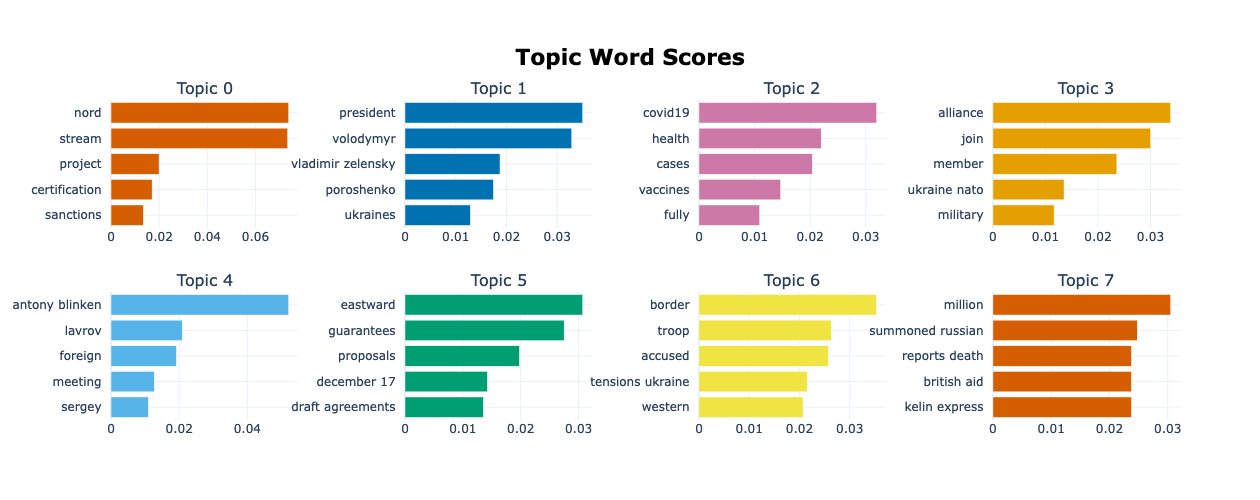

In [89]:
# fig = topic_model.visualize_barchart()
# fig.write_html("path/to/file.html")
topic_model.visualize_barchart()

In [90]:
topic_model.visualize_distribution(probs)

ValueError: This visualization cannot be used if you have set `calculate_probabilities` to False as it uses the topic probabilities of all topics. 

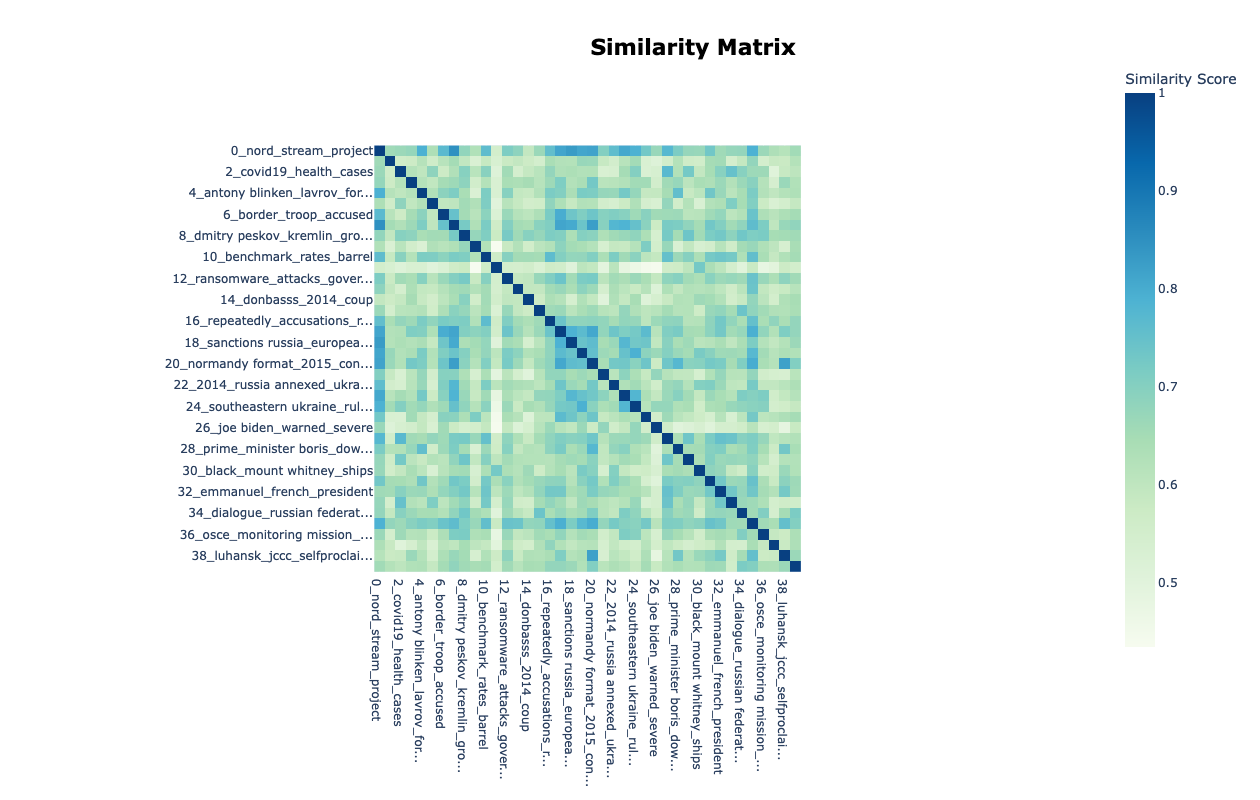

In [91]:
topic_model.visualize_heatmap()

In [93]:
# topic_model.visualize_topics()

In [ ]:
# topics_per_class = topic_model.topics_per_class(docs, topics, classes)
# topic_model.visualize_topics_per_class(topics_per_class)